### **The Dataset**

The dataset is a collection of used cars for sale in the US.

The goal is to analyze the data and develop a car classification model that will determine the price category of a used car depending on its characteristics.

NAVIGATION

[<- Data Cleaning](retro_cars_cleaning.ipynb)

-
-
-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
df_clean = pd.read_csv('data/df_clean.csv', sep=',')
df_clean.shape

(9997, 16)

In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          9997 non-null   object
 1   price           9997 non-null   int64 
 2   year            9997 non-null   int64 
 3   manufacturer    9997 non-null   object
 4   model           9997 non-null   object
 5   condition       9997 non-null   object
 6   fuel            9997 non-null   object
 7   odometer        9997 non-null   int64 
 8   title_status    9997 non-null   object
 9   transmission    9997 non-null   object
 10  type            9997 non-null   object
 11  paint_color     9997 non-null   object
 12  state           9997 non-null   object
 13  lat             9997 non-null   int64 
 14  long            9997 non-null   int64 
 15  price_category  9997 non-null   object
dtypes: int64(5), object(11)
memory usage: 1.2+ MB


In [4]:
df_clean.describe().round()

,price,year,odometer,lat,long
count,9997.0,9997.0,9997.0,9997.0,9997.0
mean,20683.0,2011.0,95655.0,39.0,-94.0
std,124641.0,10.0,86482.0,6.0,18.0
min,500.0,1915.0,0.0,-67.0,-158.0
25%,7900.0,2008.0,39149.0,35.0,-109.0
50%,15763.0,2013.0,88514.0,39.0,-88.0
75%,27990.0,2017.0,136875.0,42.0,-81.0
max,12345678.0,2022.0,3245000.0,65.0,174.0


-
-
-

### Target data analysis

In [5]:
def percentage_values(column_name):
    print(f'Percentage of occurrence of each {column_name.name} value in the dataset')
    count = column_name.value_counts(dropna=False)
    percentage = (count / len(column_name)*100).round(2)
    return pd.concat([count,percentage], axis=1, keys=['count', 'percentage'])

In [6]:
percentage_values(df_clean['price_category'])

Percentage of occurrence of each price_category value in the dataset


,count,percentage
high,3495,34.96
medium,3279,32.80
low,3223,32.24


In [7]:
def print_bar(column_name, figsize, rotation):
    colors=['#A72929','#85B9D2', '#163063']
    plt.figure(figsize=(8, 3))
    column_name.value_counts().plot(kind='bar', figsize=figsize, width=0.6, color=colors)

    plt.xlabel(column_name.name)
    plt.xticks(rotation=rotation)
    plt.ylabel('frequency')
    plt.title(f'Distribution by {column_name.name}');

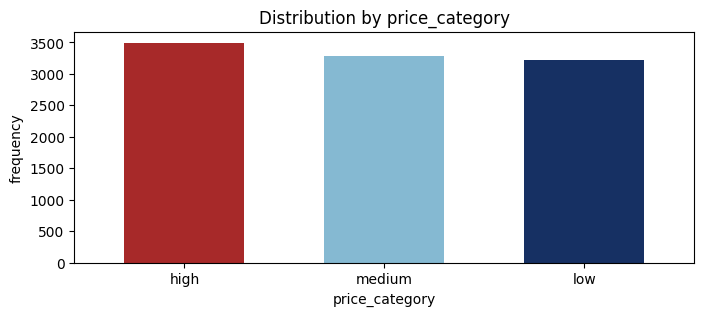

In [8]:
print_bar(df_clean['price_category'], (8,3), 0)

In [9]:
df_prepared = df_clean.copy()

In [10]:
df_prepared['price_cat_num'] = df_prepared['price_category'].replace({'low': 1, 'medium': 2, 'high': 3})
df_prepared['price_cat_num'].dtype

dtype('int64')

In [11]:
def print_corr(data):
    plt.figure(figsize=(8, 6))

    columns = data.corr().columns.tolist()
    plt.imshow(data.corr(), vmin=-1, vmax=1, cmap=('RdBu'))

    plt.title('Correlation analysis between numerical features')
    plt.xticks(range(0, len(columns)), columns)
    plt.yticks(range(0, len(columns)), columns)
    plt.colorbar()
    plt.show()

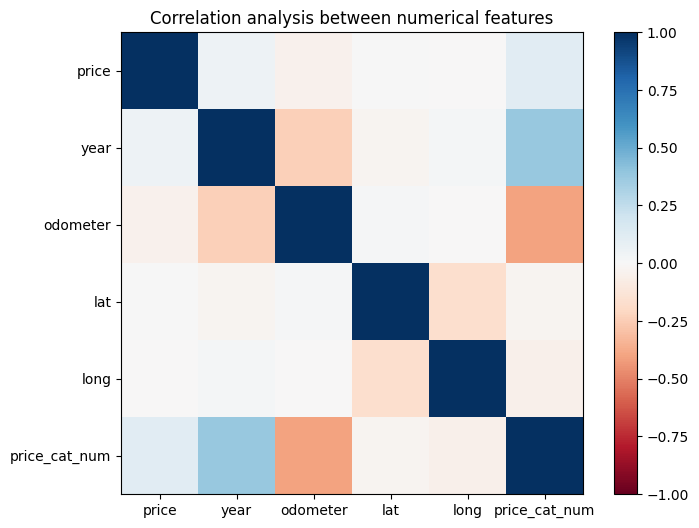

In [12]:
print_corr(df_prepared)

-
-
-

In [13]:
def print_boxplot(column_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f'Boxplot of {column_name.name}')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    flierprops = dict(marker='o', markersize=5, markerfacecolor='#163063',
                  markeredgewidth=1, markeredgecolor='#163063')  

    bp = ax.boxplot(column_name, vert=False, widths=0.5, patch_artist = True, flierprops = flierprops)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='#163063', linewidth = 2)

    for patch in bp['boxes']:
        patch.set(facecolor='#85B9D2')    
        
    bp;


In [14]:
def print_hist(column_name):
    plt.figure(figsize=(8, 4))
    plt.hist(column_name, bins=50, color='#163063', rwidth=0.8)
    plt.xlabel(f'{column_name.name} range')
    plt.ylabel('frequency')
    plt.title(f'{column_name.name} distribution');

In [15]:
def print_scatter(column_x, column_y):
    plt.figure(figsize=(8, 4))
    plt.scatter(column_x, column_y, color='#163063')
    plt.title(f'Dependence of {column_y.name} on {column_x.name}')
    plt.xlabel(column_x.name)
    plt.ylabel(column_y.name)
    plt.show();

In [16]:
def hist_by_target_feature(data, col_name, target_col):
    colors = {data[target_col].unique()[0]: '#A72929', 
              data[target_col].unique()[1]: '#85B9D2',
              data[target_col].unique()[2]: '#163063'}

    fig, ax = plt.subplots(figsize=(8, 5))
    for category in colors:
        color = colors[category]
        data_part = data[data[target_col] == category]

        ax.hist(data_part[col_name], bins=20, color=color, alpha=0.8)
        
    plt.ylabel('frequency')
    plt.xlabel(data[col_name].name)
    plt.title(f'Distribution of {data[col_name].name} by {data[target_col].name}')
    plt.legend(colors, title=(data[target_col].name));

-
-
-

In [17]:
def calculate_boundaries(column_name):
    # range of normal values
    q25 = column_name.quantile(0.25)
    q75 = column_name.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [18]:
def calculate_outliers(column_name):
    # outliers
    is_outlier = (column_name < calculate_boundaries(column_name)[0]) | (column_name > calculate_boundaries(column_name)[1])

    return is_outlier

In [19]:
def outliers(column_name):
    print(f'min {column_name.name}: {column_name.min()}')
    print(f'max {column_name.name}: {column_name.max()}')
    print(f'median {column_name.name}: {column_name.median()}')
    
    print('Range of normal values', calculate_boundaries(column_name))

    if column_name.min() < calculate_boundaries(column_name)[0]:
        print('MINIMUM VALUE BELOW NORMAL')

    if column_name.max() > calculate_boundaries(column_name)[1]:
        print('MAXIMUM VALUE ABOVE NORMAL')

    print(f'Number of outliers in the {column_name.name} column: {calculate_outliers(column_name).sum()}')
    print(f'Percentage of outliers in the {column_name.name} column: {(calculate_outliers(column_name).sum() / len(column_name) * 100).round(2)} %')

In [20]:
def lower_outlier_replacement(data, col_name):
    lower_outlier = data[col_name] < calculate_boundaries(data[col_name])[0]
    lower_boundary = calculate_boundaries(data[col_name])[0]

    data.loc[lower_outlier, [col_name]] = lower_boundary

In [21]:
def upper_outlier_replacement(data, col_name):
    upper_outlier = data[col_name] > calculate_boundaries(data[col_name])[1]
    upper_boundary = calculate_boundaries(data[col_name])[1]

    data.loc[upper_outlier, [col_name]] = upper_boundary



-
-
-

### Elimination of outliers

In [22]:
outliers(df_prepared.price)

min price: 500
max price: 12345678
median price: 15763.0
Range of normal values (-22235.0, 58125.0)
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the price column: 215
Percentage of outliers in the price column: 2.15 %


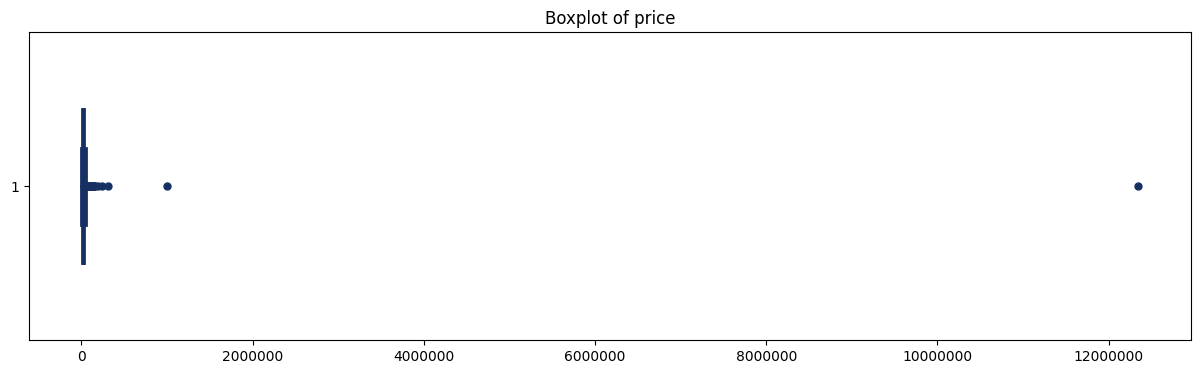

In [23]:
print_boxplot(df_prepared.price)

In [24]:
df_prepared[['price', 'price_cat_num']].corr().round(2)

,price,price_cat_num
price,1.00,0.11
price_cat_num,0.11,1.00


In [25]:
upper_outlier_replacement(df_prepared, 'price')

In [26]:
outliers(df_prepared.price)

min price: 500
max price: 58125
median price: 15763.0
Range of normal values (-22235.0, 58125.0)
Number of outliers in the price column: 0
Percentage of outliers in the price column: 0.0 %


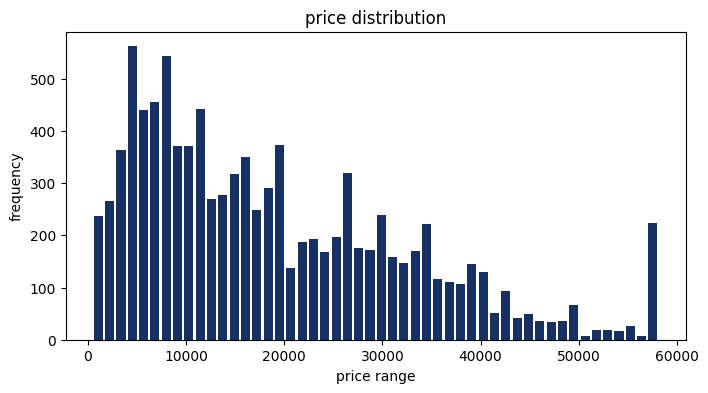

In [27]:
print_hist(df_prepared.price)

In [28]:
df_prepared[['price', 'price_cat_num']].corr().round(2)

,price,price_cat_num
price,1.00,0.88
price_cat_num,0.88,1.00


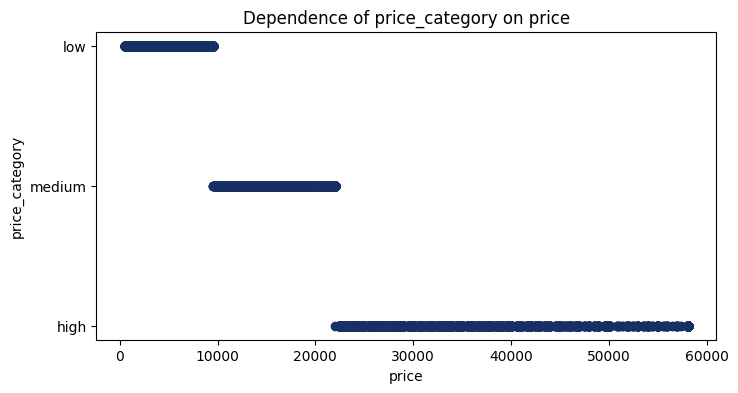

In [29]:
print_scatter(df_prepared['price'], df_prepared['price_category'])

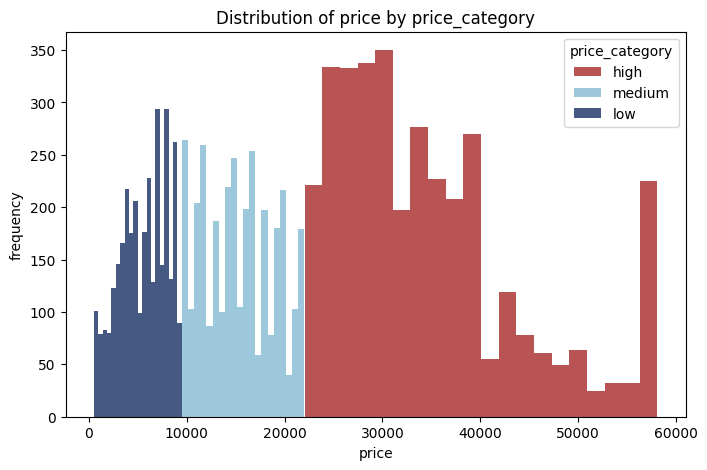

In [30]:
hist_by_target_feature(df_prepared, 'price', 'price_category')

-
-
-

In [31]:
outliers(df_prepared.year)

min year: 1915
max year: 2022
median year: 2013.0
Range of normal values (1994.5, 2030.5)
MINIMUM VALUE BELOW NORMAL
Number of outliers in the year column: 394
Percentage of outliers in the year column: 3.94 %


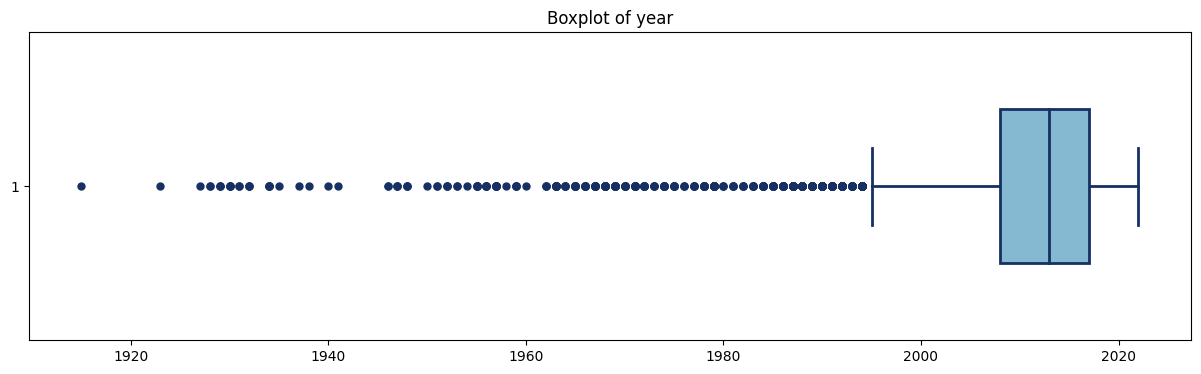

In [32]:
print_boxplot(df_prepared.year)

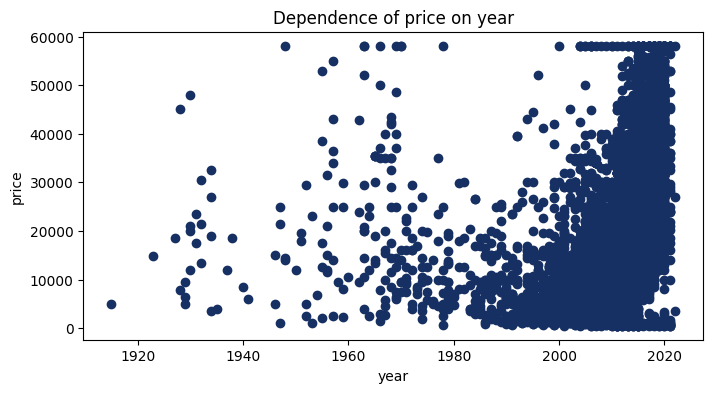

In [33]:
print_scatter(df_prepared['year'], df_prepared['price'])

In [34]:
print('Average car prices by manufacture year')
price_by_year = df_prepared.groupby(['year'], as_index=False).agg({'price':'mean'}).rename(columns={'price':'mean_price'})
price_by_year.round(2).head(10)

Average car prices by manufacture year


,year,mean_price
0,1915,5000.00
1,1923,14950.00
2,1927,18500.00
3,1928,26400.00
4,1929,6981.67
5,1930,25237.50
6,1931,20500.00
7,1932,21833.33
8,1934,20498.75
9,1935,4000.00


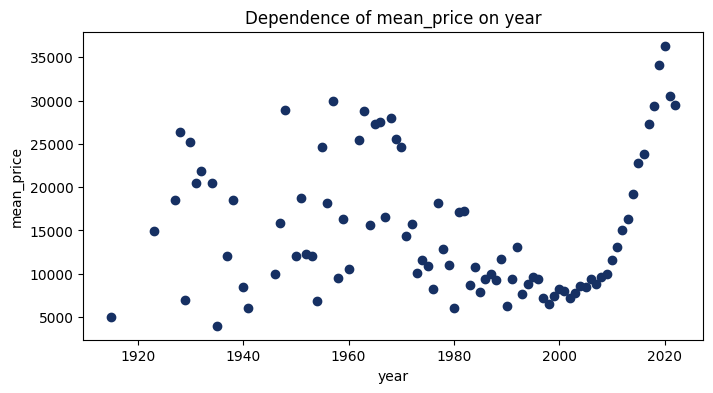

In [35]:
print_scatter(price_by_year['year'], price_by_year['mean_price'])

In [36]:
print('Number of cars produced by manufacture year')
count_by_year = df_prepared.groupby(['year'], as_index=False)[['price']].count().rename(columns={'price': 'cars_count'})
count_by_year.head(10)

Number of cars produced by manufacture year


,year,cars_count
0,1915,1
1,1923,1
2,1927,1
3,1928,2
4,1929,3
5,1930,4
6,1931,2
7,1932,3
8,1934,4
9,1935,1


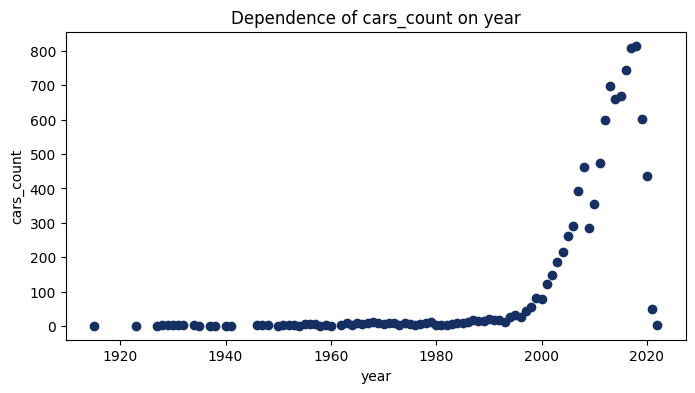

In [37]:
print_scatter(count_by_year['year'], count_by_year['cars_count'])

In [38]:
lower_outlier_replacement(df_prepared, 'year')

In [39]:
outliers(df_prepared.year)

min year: 1994.5
max year: 2022.0
median year: 2013.0
Range of normal values (1994.5, 2030.5)
Number of outliers in the year column: 0
Percentage of outliers in the year column: 0.0 %


In [40]:
df_prepared.year = df_prepared.year.astype(int)
df_prepared.year.dtype

dtype('int64')

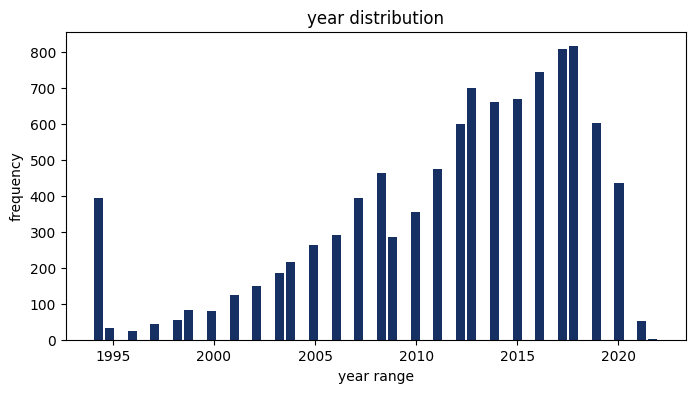

In [41]:
print_hist(df_prepared.year)

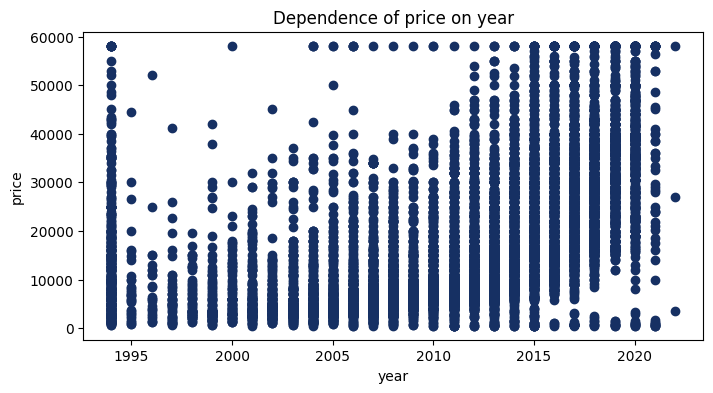

In [42]:
print_scatter(df_prepared['year'], df_prepared['price'])

In [43]:
df_prepared[['year', 'price_cat_num']].corr().round(2)

,year,price_cat_num
year,1.00,0.55
price_cat_num,0.55,1.00


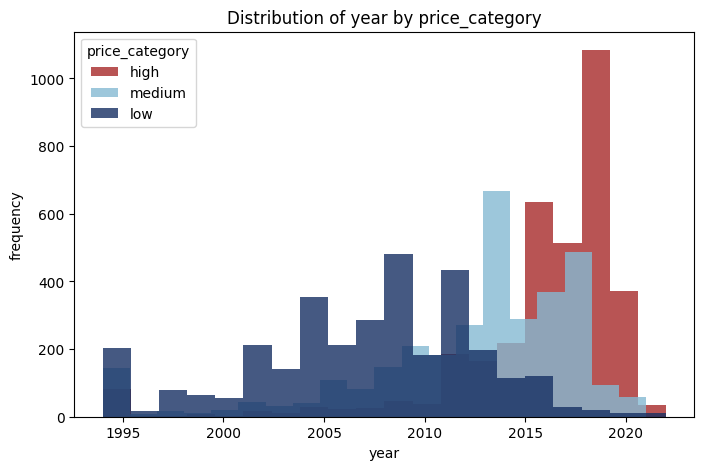

In [44]:
hist_by_target_feature(df_prepared, 'year', 'price_category')

-
-
-

In [45]:
outliers(df_prepared.odometer)

min odometer: 0
max odometer: 3245000
median odometer: 88514.0
Range of normal values (-107440.0, 283464.0)
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the odometer column: 91
Percentage of outliers in the odometer column: 0.91 %


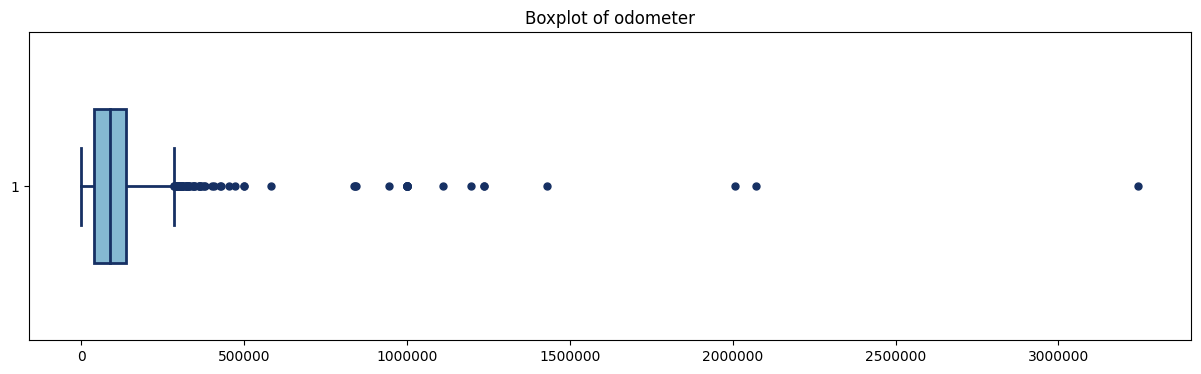

In [46]:
print_boxplot(df_prepared.odometer)

In [47]:
df_prepared[['odometer', 'price_cat_num']].corr().round(2)

,odometer,price_cat_num
odometer,1.0,-0.4
price_cat_num,-0.4,1.0


In [48]:
upper_outlier_replacement(df_prepared, 'odometer')

In [49]:
outliers(df_prepared.odometer)

min odometer: 0
max odometer: 283464
median odometer: 88514.0
Range of normal values (-107440.0, 283464.0)
Number of outliers in the odometer column: 0
Percentage of outliers in the odometer column: 0.0 %


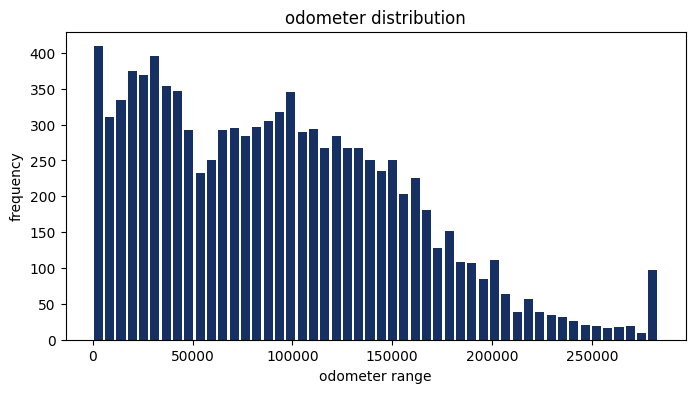

In [50]:
print_hist(df_prepared.odometer)

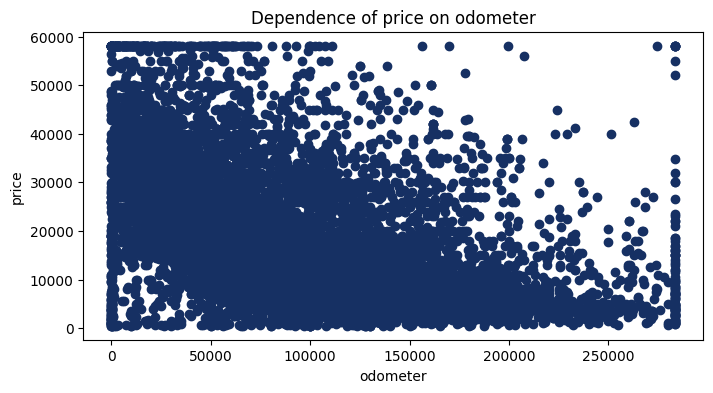

In [51]:
print_scatter(df_prepared.odometer, df_prepared.price)

In [52]:
df_prepared[['odometer', 'price_cat_num']].corr().round(2)

,odometer,price_cat_num
odometer,1.00,-0.54
price_cat_num,-0.54,1.00


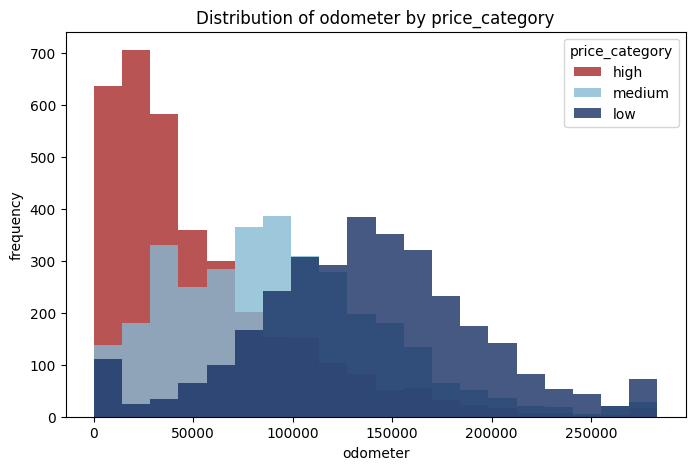

In [53]:
hist_by_target_feature(df_prepared, 'odometer', 'price_category')

-
-
-
-
-

In [54]:
outliers(df_prepared.lat)

min lat: -67
max lat: 65
median lat: 39.0
Range of normal values (24.5, 52.5)
MINIMUM VALUE BELOW NORMAL
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the lat column: 143
Percentage of outliers in the lat column: 1.43 %


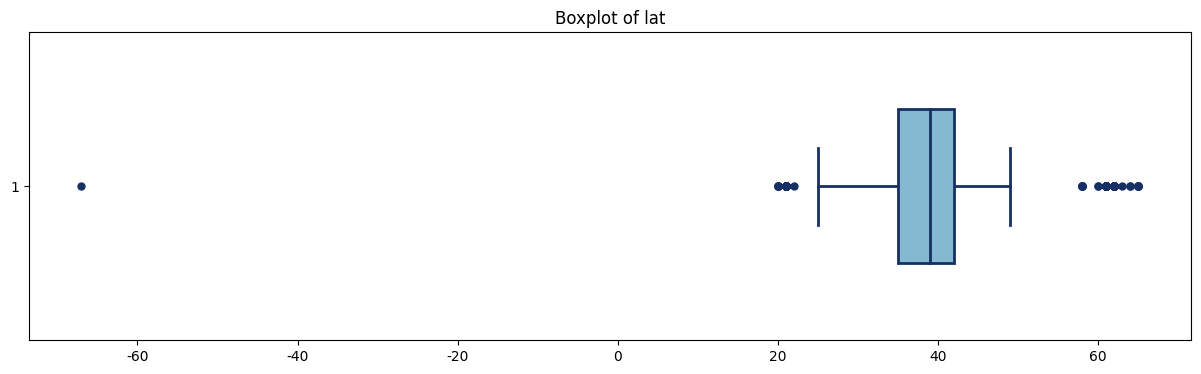

In [55]:
print_boxplot(df_prepared.lat)

In [56]:
df_prepared[['lat', 'price_cat_num']].corr().round(2)

,lat,price_cat_num
lat,1.00,-0.02
price_cat_num,-0.02,1.00


In [57]:
lower_outlier_replacement(df_prepared, 'lat')
upper_outlier_replacement(df_prepared, 'lat')

In [58]:
df_prepared[['lat', 'price_cat_num']].corr().round(2)

,lat,price_cat_num
lat,1.00,-0.03
price_cat_num,-0.03,1.00


In [59]:
outliers(df_prepared.long)

min long: -158
max long: 174
median long: -88.0
Range of normal values (-151.0, -39.0)
MINIMUM VALUE BELOW NORMAL
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the long column: 57
Percentage of outliers in the long column: 0.57 %


In [60]:
lower_outlier_replacement(df_prepared, 'long')
upper_outlier_replacement(df_prepared, 'long')

In [61]:
df_prepared[['long', 'price_cat_num']].corr().round(2)

,long,price_cat_num
long,1.00,-0.05
price_cat_num,-0.05,1.00


In [62]:
df_prepared = df_prepared.drop(columns=['lat', 'long'])
df_prepared.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'fuel',
       'odometer', 'title_status', 'transmission', 'type', 'paint_color',
       'state', 'price_category', 'price_cat_num'],
      dtype='object')

In [63]:
df_prepared.corr().round(2)

,price,year,odometer,price_cat_num
price,1.00,0.53,-0.53,0.88
year,0.53,1.00,-0.50,0.55
odometer,-0.53,-0.50,1.00,-0.54
price_cat_num,0.88,0.55,-0.54,1.00


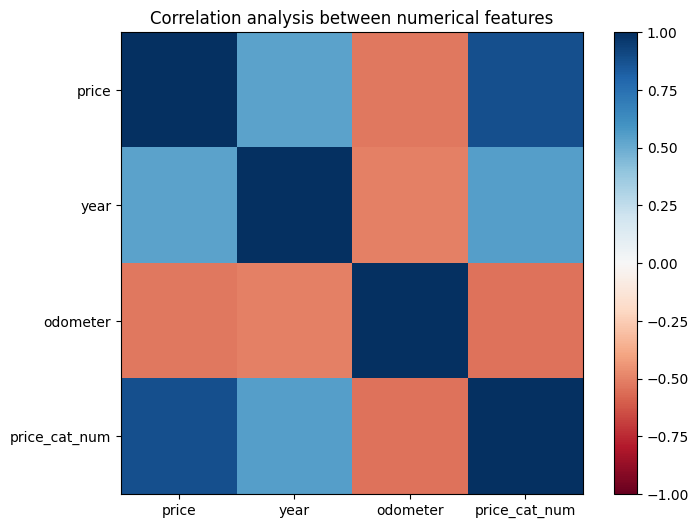

In [64]:
print_corr(df_prepared)

-
-
-
-
-

### Categorical data

In [65]:
percentage_values(df_prepared.fuel)

Percentage of occurrence of each fuel value in the dataset


,count,percentage
gas,8402,84.05
other,790,7.90
diesel,653,6.53
hybrid,108,1.08
electric,44,0.44


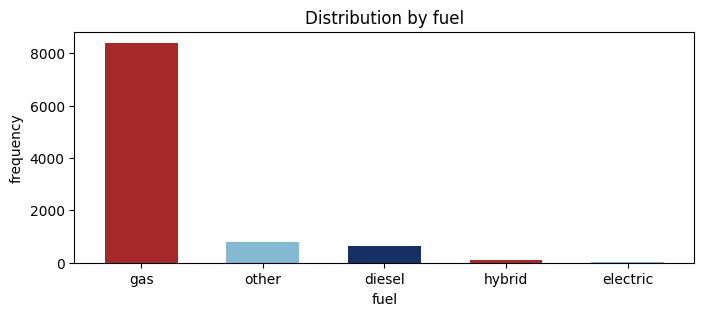

In [66]:
print_bar(df_prepared.fuel, (8,3), 0)

-
-
-

In [67]:
percentage_values(df_prepared.transmission)

Percentage of occurrence of each transmission value in the dataset


,count,percentage
automatic,7700,77.02
other,1666,16.66
manual,631,6.31


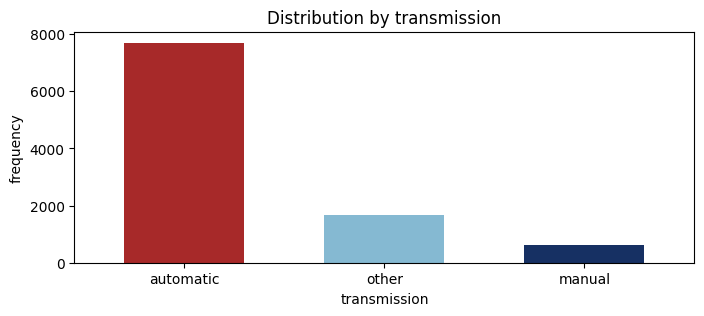

In [68]:
print_bar(df_prepared.transmission, (8,3), 0)

-
-
-

In [70]:
percentage_values(df_prepared.manufacturer)

Percentage of occurrence of each manufacturer value in the dataset


,count,percentage
ford,1638,16.38
chevrolet,1293,12.93
toyota,779,7.79
jeep,490,4.90
honda,466,4.66
nissan,454,4.54
ram,411,4.11
other,379,3.79
gmc,358,3.58
bmw,330,3.30


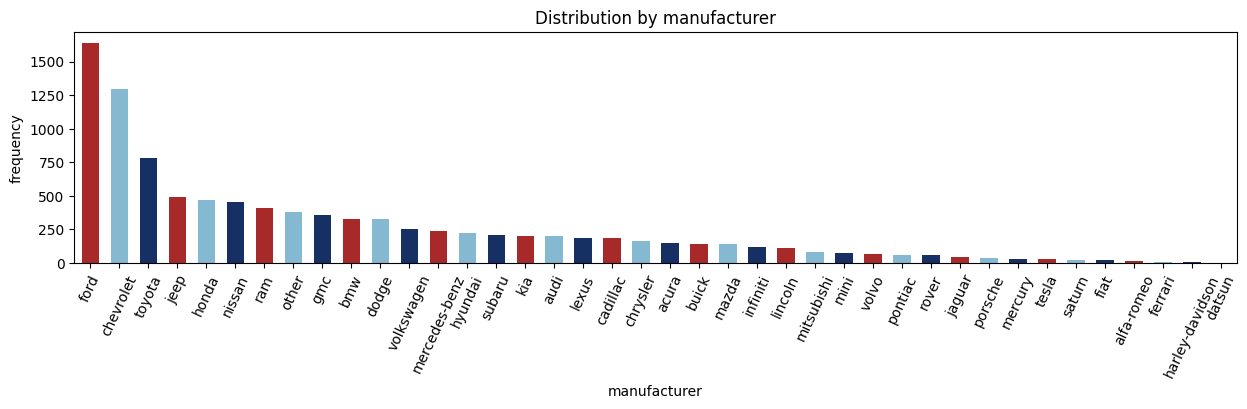

In [71]:
print_bar(df_prepared.manufacturer, (15,3), 65)

-
-
-
-
-

NAVIGATION

[<- Data Cleaning](retro_cars_cleaning.ipynb)